In [6]:
import torch
!pip install detecto
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os,glob
from detecto.core import Model

In [8]:
model = Model.load('model_weights.pth', ['hydrant'])

In [4]:
# !unzip /content/test.zip -d /content/

In [14]:
def Hydrantifier (Img_path_str):
  image = utils.read_image(Img_path_str)  
  top_predictions = model.predict_top(image)
  labels, boxes, scores = top_predictions
  thresh=0.5
  filtered_indices=np.where(scores>thresh)
  filtered_scores=scores[filtered_indices]
  filtered_boxes=boxes[filtered_indices]
  num_list = filtered_indices[0].tolist()
  filtered_labels = [labels[i] for i in num_list]
  show_labeled_image(image, filtered_boxes, filtered_labels)
  print('Accuracy score: {}'.format(float(scores)))
  print('')
  if scores < thresh:
    print('No hydrant identified in above image because of low score value ({})'.format(float(scores)))

  print('')

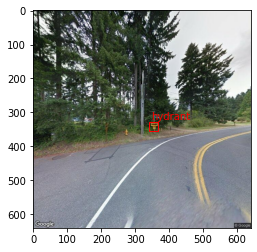

Accuracy score: 0.8941461443901062




In [16]:
Hydrantifier('/content/test/cbe35b6c-e0e7-4643-8930-883476e28892.jpg')